# Estrategia de inversión con base en medias moviles

**Estadística Aplicada**\
**Alejandro Hernández Cerda** \
**Sesión 15 - 21 de Marzo 2023**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importamos las libreria
import yfinance as yf

In [3]:
# Los datos
# Nombre en bolsa de la empresa
ticker = 'AMZN'
amazon = yf.download(ticker,start='2019-01-01',end='2023-03-17',progress=False)

In [4]:
amazon

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08,83.234497,83.830498,80.830498,82.829002,82.829002,177628000
...,...,...,...,...,...,...
2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69747500
2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100
2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700


In [5]:
amazon = amazon[['Adj Close']]
amazon = amazon.rename(columns={'Adj Close':'precio_cierre'})

In [6]:
#Calcularemos promedio movil 10 días 
amazon['MA-10']=amazon['precio_cierre'].rolling(window=10).mean()
#Promedio movil a 60 dias
## Tendencia de largo plazo
amazon['MA-60']=amazon['precio_cierre'].rolling(window=60).mean()

In [7]:
amazon

,precio_cierre,MA-10,MA-60
Date,,,
2019-01-02,76.956497,NaN,NaN
2019-01-03,75.014000,NaN,NaN
2019-01-04,78.769501,NaN,NaN
2019-01-07,81.475502,NaN,NaN
2019-01-08,82.829002,NaN,NaN
...,...,...,...
2023-03-10,90.730003,93.139001,93.871334
2023-03-13,92.430000,93.006001,93.870334
2023-03-14,94.879997,93.071000,93.925334


In [8]:
#Debemos invertir cuando el precio de corto plazo esté por encima del de largo plazo
amazon['invertir']=amazon['MA-10']>amazon['MA-60']
amazon

,precio_cierre,MA-10,MA-60,invertir
Date,,,,
2019-01-02,76.956497,NaN,NaN,False
2019-01-03,75.014000,NaN,NaN,False
2019-01-04,78.769501,NaN,NaN,False
2019-01-07,81.475502,NaN,NaN,False
2019-01-08,82.829002,NaN,NaN,False
...,...,...,...,...
2023-03-10,90.730003,93.139001,93.871334,False
2023-03-13,92.430000,93.006001,93.870334,False
2023-03-14,94.879997,93.071000,93.925334,False


In [11]:
## señal
#Crear una columna qye indique si debe comprar o vender 
amazon['señal']=0
amazon.loc[amazon['invertir'],'señal']=1 #comprar / mantener
# ~ es una negación
amazon.loc[~amazon['invertir'],'señal']=-1 #vender/no comprar

In [12]:
amazon

,precio_cierre,MA-10,MA-60,invertir,señal
Date,,,,,
2019-01-02,76.956497,NaN,NaN,False,-1
2019-01-03,75.014000,NaN,NaN,False,-1
2019-01-04,78.769501,NaN,NaN,False,-1
2019-01-07,81.475502,NaN,NaN,False,-1
2019-01-08,82.829002,NaN,NaN,False,-1
...,...,...,...,...,...
2023-03-10,90.730003,93.139001,93.871334,False,-1
2023-03-13,92.430000,93.006001,93.870334,False,-1
2023-03-14,94.879997,93.071000,93.925334,False,-1


$ Rendimiento = \frac{P_t-P_{t-1}}{P_{t-1}} $

In [13]:
#Rendimiento de la acción amazon
amazon['rendimiento']=amazon['precio_cierre'].pct_change()

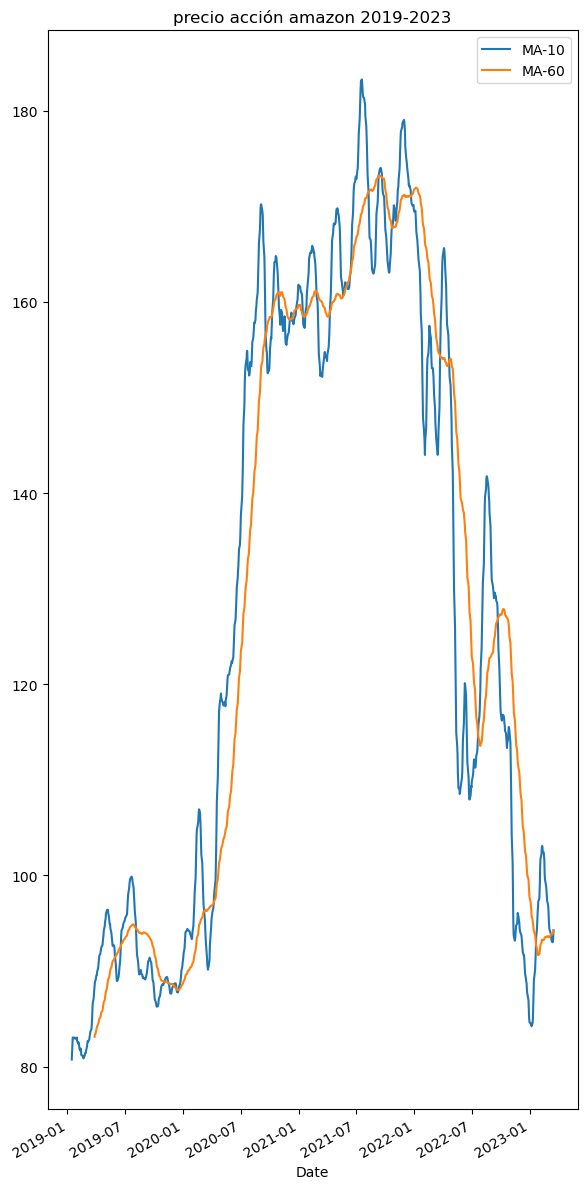

In [14]:
#Gráfica de MA-10 y MA-60
amazon[['MA-10','MA-60']].plot(figsize=(6,12))
plt.title('precio acción amazon 2019-2023')
plt.tight_layout()

In [15]:
amazon

,precio_cierre,MA-10,MA-60,invertir,señal,rendimiento
Date,,,,,,
2019-01-02,76.956497,NaN,NaN,False,-1,NaN
2019-01-03,75.014000,NaN,NaN,False,-1,-0.025241
2019-01-04,78.769501,NaN,NaN,False,-1,0.050064
2019-01-07,81.475502,NaN,NaN,False,-1,0.034353
2019-01-08,82.829002,NaN,NaN,False,-1,0.016612
...,...,...,...,...,...,...
2023-03-10,90.730003,93.139001,93.871334,False,-1,-0.016477
2023-03-13,92.430000,93.006001,93.870334,False,-1,0.018737
2023-03-14,94.879997,93.071000,93.925334,False,-1,0.026507


In [16]:
#rendimiento total del periodo
amazon['rendimiento'].sum().round(3)

0.534

In [17]:
amazon['rendimiento'].sum()

0.5343304975872827

In [19]:
#para ver el rendimiento
amazon.query('señal==1')['rendimiento'].sum().round(3)

0.199

In [20]:
amazon.query('señal==-1')['rendimiento'].sum().round(3)

0.335